<a href="https://colab.research.google.com/github/RFJC21/Holt-Winters-vs-SARIMA-Forecasting/blob/master/Comparison_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.statespace.tools import diff
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf,pacf_yw,pacf_ols
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR, ARResults
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse, rmse,meanabs
from statsmodels.graphics.tsaplots import  month_plot,quarter_plot

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import  seasonal_decompose

!pip install pmdarima
from pmdarima import auto_arima

%matplotlib inline

# **Holt Winter's**

# Import Data

In [238]:
uploaded = files.upload()

Saving BeerWineLiquor.csv to BeerWineLiquor (2).csv


In [400]:
import io
df = pd.read_csv(io.BytesIO(uploaded['BeerWineLiquor.csv']),index_col=['DATE'], parse_dates=True)# 0 é a primeira coluna
df

,BEER
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


In [401]:
df.index.freq='MS'
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=324, freq='MS')

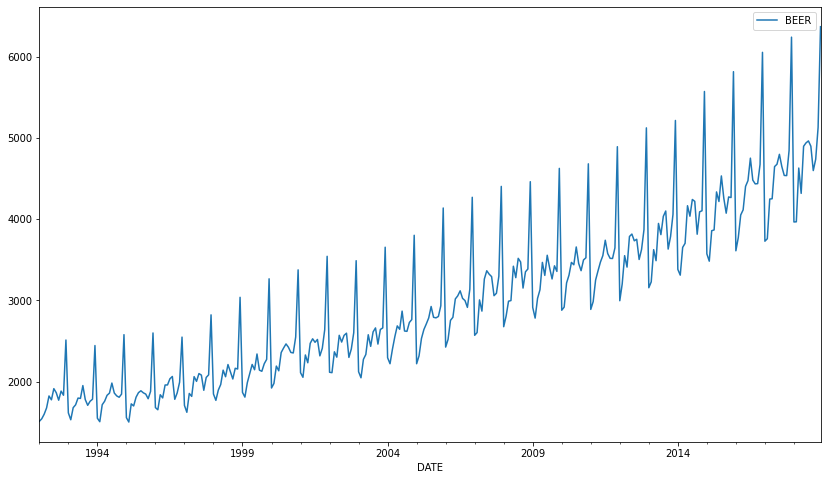

In [241]:
df.plot(figsize=(14,8))

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [402]:
df

,BEER
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


# Triple Smoothing

In [0]:
# triple exponential smoothing
#df['TES_mul_12']=ExponentialSmoothing(df['BEER'], trend='mul',seasonal='mul', seasonal_periods=12).fit().fittedvalues

In [0]:
#df[['BEER','TES_mul_12']].iloc[:24].plot(figsize=(14,8))

# Split Data

In [114]:
len(df)

324

In [0]:
train=df.iloc[:313]
test=df.iloc[312:]

In [404]:
test

,BEER
DATE,
2018-01-01,3965
2018-02-01,3967
2018-03-01,4629
2018-04-01,4317
2018-05-01,4897
2018-06-01,4939
2018-07-01,4963
2018-08-01,4898
2018-09-01,4598


# Fit model to train

In [0]:
fitted_model=ExponentialSmoothing(train['BEER'],trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast on test data

In [406]:
test_predictions_hw=fitted_model.forecast(steps=12)
test_predictions_hw

2018-02-01    3998.351440
2018-03-01    4435.637958
2018-04-01    4454.116356
2018-05-01    4835.936760
2018-06-01    4855.090243
2018-07-01    5029.581390
2018-08-01    4853.233611
2018-09-01    4736.599660
2018-10-01    4757.858278
2018-11-01    5011.687507
2018-12-01    6396.817778
2019-01-01    4092.589522
Freq: MS, dtype: float64

# Plot

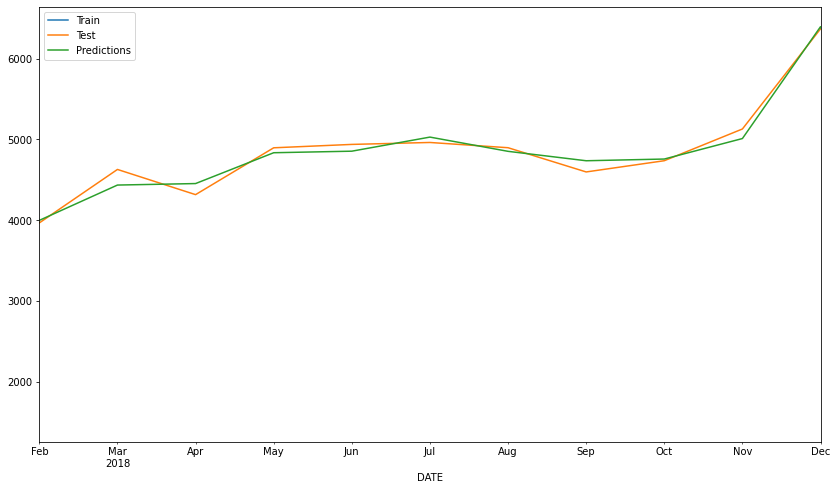

In [484]:
train_data['BEER'].plot(legend=True,label='Train', figsize=(14,8))
test_data['BEER'].plot(legend=True,label='Test', figsize=(14,8))
test_predictions_hw.plot(legend=True, label='Predictions',xlim=['2018-02-01','2018-12-01'])

# Evaluate

In [408]:
error_hw=rmse(test['BEER'],test_predictions_hw)
error_hw

788.5169263179916

In [409]:
np.sqrt(mean_squared_error(test,test_predictions_hw))

788.5169263179916

In [178]:
test['BEER'].mean()

4784.166666666667

# Re-fit model with full data

In [0]:
final_model=ExponentialSmoothing(df['BEER'],trend='add', seasonal='add', seasonal_periods=12).fit()

In [0]:
forecast_predictions=final_model.forecast(12)

(528.0, 601.0)

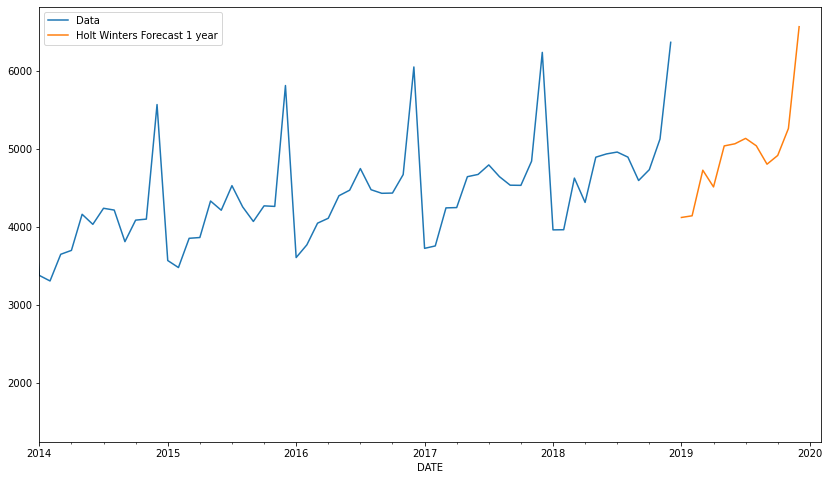

In [412]:
df['BEER'].plot(figsize=(14,8), legend=True,label='Data')
forecast_predictions.plot(legend=True,label='Holt Winters Forecast 1 year')
plt.xlim('2014-01-01','2020-02-01')

# **SARIMA**

In [419]:
df = pd.read_csv(io.BytesIO(uploaded['BeerWineLiquor.csv']),index_col=['DATE'],parse_dates=True)
df

,BEER
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


# Seasonality

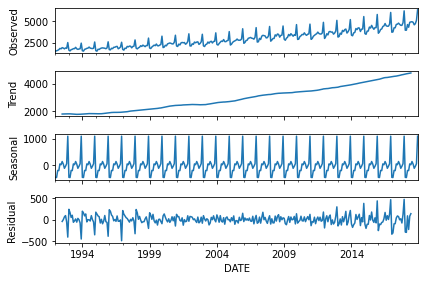

In [420]:
result=seasonal_decompose(df['BEER'],model='add')
result.plot();

# Chose ARIMA Orders

In [130]:
auto_arima(df['BEER'],seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 1, 1, 12) (constant=True); AIC=3611.346, BIC=3641.264, Time=5.474 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=3830.362, BIC=3837.842, Time=0.054 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=3711.250, BIC=3726.209, Time=0.615 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3644.844, BIC=3659.803, Time=1.455 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=3828.363, BIC=3832.102, Time=0.039 seconds
Fit ARIMA: (2, 1, 2)x(0, 1, 1, 12) (constant=True); AIC=3615.053, BIC=3641.231, Time=4.489 seconds
Fit ARIMA: (2, 1, 2)x(1, 1, 0, 12) (constant=True); AIC=3620.644, BIC=3646.822, Time=3.113 seconds
Fit ARIMA: (2, 1, 2)x(2, 1, 1, 12) (constant=True); AIC=3611.072, BIC=3644.730, Time=15.379 seconds
Fit ARIMA: (2, 1, 2)x(2, 1, 0, 12) (constant=True); AIC=3617.392, BIC=3647.310, Time=8.836 seconds
Fit ARIMA: (2, 1, 2)x(2, 1, 2, 12) (constant=True); AIC=3577.840

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  324
Model:             SARIMAX(2, 1, 3)x(2, 1, 2, 12)   Log Likelihood               -1768.607
Date:                            Sun, 05 Apr 2020   AIC                           3559.214
Time:                                    18:14:16   BIC                           3600.352
Sample:                                         0   HQIC                          3575.657
                                            - 324                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2608      0.396      0.658      0.511      -0.516       1.038
ar.L1         -1.1536      0.007   -159.588      0.000      -1.168      -1.139
ar.L2         -0.9970      0.006   -179.072      0.000      -1.008      -0.986
ma.L1          0.3610      0.061      5.900      0.000       0.241       0.481
ma.L2          0.1315      0.063      2.094      0.036       0.008       0.255
ma.L3         -0.7582      0.059    -12.744      0.000      -0.875      -0.642
ar.S.L12       1.4318      0.123     11.627      0.000       1.190       1.673
ar.S.L24      -0.5581      0.128     -4.359      0.000      -0.809      -0.307
ma.S.L12      -1.7984      0.129    -13.993      0.000      -2.050      -1.547
ma.S.L24       0.9092      0.130      6.970      0.000       0.654       1.165
sigma2      5838.7837    644.450      9.060      0.000    4575.685    7101.882
===================================================================================
Ljung-Box (Q):                       98.98   Jarque-Bera (JB):                 5.05
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               1.82   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Split Data

In [0]:
train=df.iloc[:312]
test=df.iloc[312:]

# Define Model

In [422]:
model=SARIMAX(train['BEER'],order=(2,1,3),seasonal_order=(2,1,2,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               BEER   No. Observations:                  312
Model:             SARIMAX(2, 1, 3)x(2, 1, 2, 12)   Log Likelihood               -1712.529
Date:                            Sun, 05 Apr 2020   AIC                           3445.058
Time:                                    20:29:15   BIC                           3482.063
Sample:                                01-01-1992   HQIC                          3459.869
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2588      0.754      0.343      0.731      -1.219       1.736
ar.L2          0.1219      0.763      0.160      0.873      -1.374       1.618
ma.L1         -0.9525      0.747     -1.274      0.203      -2.418       0.513
ma.L2          0.1439      1.013      0.142      0.887      -1.842       2.129
ma.L3         -0.0141      0.526     -0.027      0.979      -1.045       1.017
ar.S.L12       0.8890      0.097      9.149      0.000       0.699       1.079
ar.S.L24      -0.8511      0.072    -11.879      0.000      -0.992      -0.711
ma.S.L12      -1.0842      0.128     -8.466      0.000      -1.335      -0.833
ma.S.L24       0.7609      0.138      5.506      0.000       0.490       1.032
sigma2      5939.9208    509.467     11.659      0.000    4941.384    6938.458
===================================================================================
Ljung-Box (Q):                       86.00   Jarque-Bera (JB):                 8.81
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.79   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predict Values for test data

In [0]:
start=len(train)
end=len(train)+len(test)-1

predictions_SARIMA=results.predict(start, end,type='levels').rename('SARIMA Predcitions')

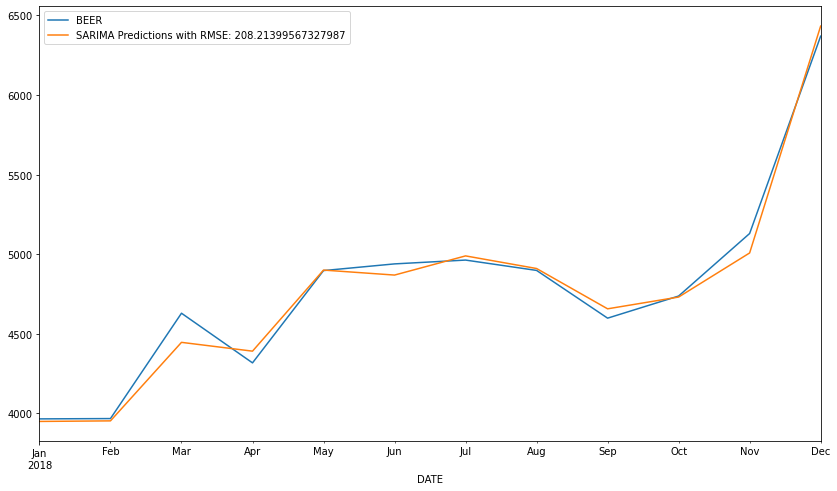

In [424]:
test['BEER'].plot(figsize=(14,8),legend=True)
predictions_SARIMA.plot(legend=True, label=f'SARIMA Predictions with RMSE: {error}')

# Evaluate

In [426]:
error_SARIMA=rmse(test['BEER'],predictions_SARIMA)
error_SARIMA

75.06788428141931

# Rerain Model in Full Data

In [0]:
model_final=SARIMAX(df['BEER'],order=(2,1,3), seasonal_order=(2,1,2,12))
results_final=model_final.fit()

# Forecast

In [0]:
forecast=results_final.predict(len(df),len(df)+11,type='levels').rename('SARIMA Forecast')

(528.0, 601.0)

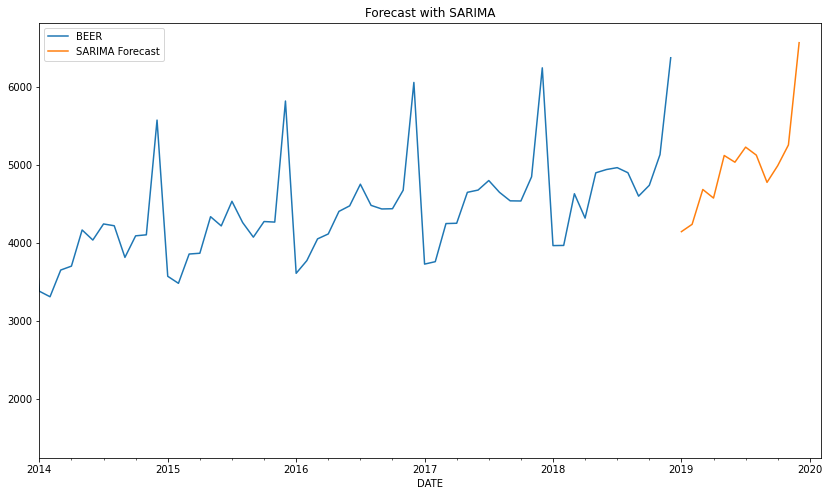

In [521]:
df['BEER'].plot(figsize=(14,8),legend=True,title='Forecast with SARIMA')
forecast.plot(legend=True)
plt.xlim('2014-01-01','2020-02-01')

# Holt Winters vs SARIMA in test Data

(577.0, 587.0)

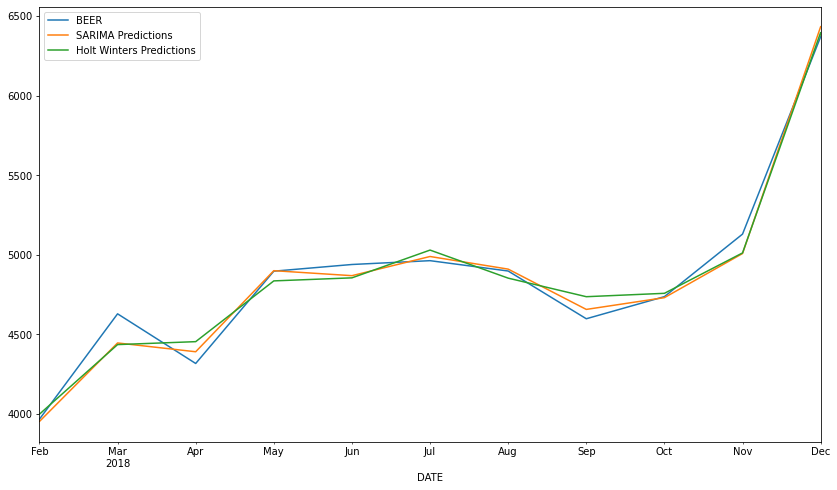

In [479]:
test['BEER'].plot(figsize=(14,8),legend=True)
predictions_SARIMA.plot(legend=True, label=f'SARIMA Predictions')
test_predictions_hw.plot(legend=True, label=f'Holt Winters Predictions')
plt.xlim('2018-02-01','2018-12-01')

# **LSTM**

In [485]:
df = pd.read_csv(io.BytesIO(uploaded['BeerWineLiquor.csv']),index_col=['DATE'],parse_dates=True)
df

,BEER
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


In [0]:
df.index.freq='MS'

# Split Data

In [0]:
train=df.iloc[:312]
test=df.iloc[312:]

# Scale or normalize the data -> Better Results

In [488]:
from sklearn.preprocessing import MinMaxScaler
#Scale
scaler=MinMaxScaler()
scaler.fit(train) # finds max value

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# Transform
scaled_train= scaler.transform(train)

In [0]:
scaled_test=scaler.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
# como decidir n_inputs? se a sasonalidade for ao ano (12 meses), colocar 12
# batch size (sendo 1 significa que produz um resultado), no caso de lstm time series, produz melhors resultados sendo 1

n_input=12
n_features=1

generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

# Create Model

In [493]:
model=Sequential()
model.add(LSTM(128,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 70,721
Trainable params: 70,721
Non-trainable params: 0
_________________________________________________________________


# Fit Model

In [494]:
model.fit_generator(generator,epochs=15)

Epoch 1/15
300/300 [==============================] - 2s 6ms/step - loss: 0.0161
Epoch 2/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0095
Epoch 3/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0076
Epoch 4/15
300/300 [==============================] - 2s 6ms/step - loss: 0.0071
Epoch 5/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0038
Epoch 6/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0027
Epoch 7/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0041
Epoch 8/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0016
Epoch 9/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0011
Epoch 10/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0010
Epoch 11/15
300/300 [==============================] - 2s 7ms/step - loss: 6.8974e-04
Epoch 12/15
300/300 [==============================] - 2s 6ms/step - loss: 7.1301e-04
Epoch 13/15
300/3

# Plot Loss

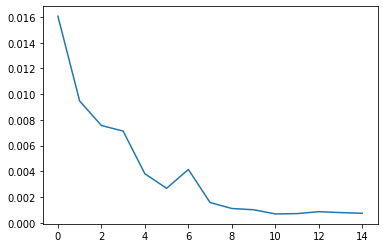

In [495]:
loss=model.history.history['loss']
epochs=range(len(loss))
plt.plot(epochs,loss)

# Create Evaluation Batch

In [0]:
# our model: 12 history steps -> step 13
# last 12 points of train data -> first point of test data
first_eval_batch= scaled_train[-12:]

In [0]:
first_eval_batch=first_eval_batch.reshape((1,n_input,n_features))

In [498]:
model.predict(first_eval_batch)

array([[0.5134879]], dtype=float32)

# Forecast

In [0]:
#hold predictions
test_predictions_LSTM=[]

# last n_nput points from train set
first_eval_batch=scaled_train[-n_input:]

#reshape this to RNN format
current_batch=first_eval_batch.reshape((1,n_input,n_features))

#How far into the future will I forecast?
# em vez de len(test), pode ser (24), ou seja 12 do test mais 12 do futuro
for i in range(len(test)):

    #one timestep ahead of hsitocial 12 points
    current_pred=model.predict(current_batch)[0]

    #store that prediction
    test_predictions_LSTM.append(current_pred)

    #update current batch to include prediction
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


# Invert Scale

In [0]:
true_predictions_LSTM=scaler.inverse_transform(test_predictions_LSTM)

In [0]:
test['Predictions_LSTM'] = true_predictions_LSTM

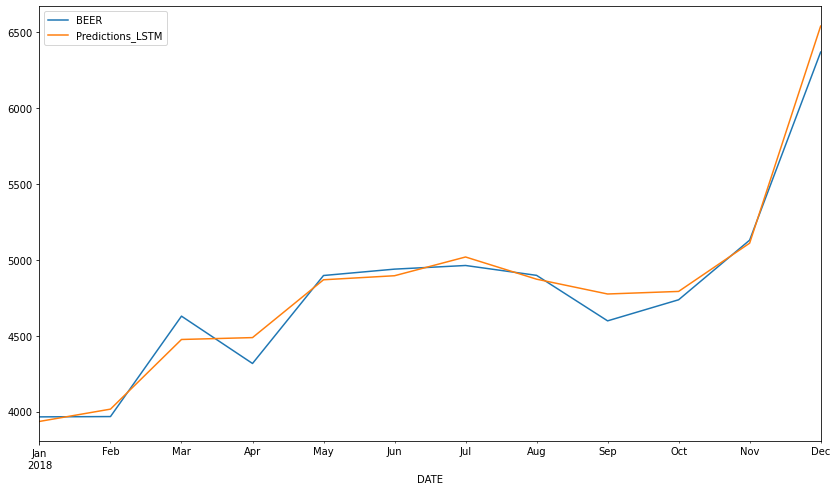

In [502]:
test.plot(figsize=(14,8))

# Re train model

In [0]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [0]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [507]:
model=Sequential()
model.add(LSTM(128,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 70,721
Trainable params: 70,721
Non-trainable params: 0
_________________________________________________________________


In [508]:
model.fit_generator(generator,epochs=15)

Epoch 1/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0147
Epoch 2/15
312/312 [==============================] - 2s 6ms/step - loss: 0.0093
Epoch 3/15
312/312 [==============================] - 2s 6ms/step - loss: 0.0089
Epoch 4/15
312/312 [==============================] - 2s 6ms/step - loss: 0.0070
Epoch 5/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 6/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0039
Epoch 7/15
312/312 [==============================] - 3s 9ms/step - loss: 0.0031
Epoch 8/15
312/312 [==============================] - 2s 6ms/step - loss: 0.0018
Epoch 9/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0016
Epoch 10/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0013
Epoch 11/15
312/312 [==============================] - 2s 7ms/step - loss: 8.9638e-04
Epoch 12/15
312/312 [==============================] - 2s 6ms/step - loss: 9.9918e-04
Epoch 13/15
312/3

In [0]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [510]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[4073.69631267],
       [4118.78831244],
       [4789.78138542],
       [4490.52078819],
       [5070.88347054],
       [5114.61228228],
       [5142.98863029],
       [5077.55871272],
       [4788.56652355],
       [4931.71313262],
       [5337.1899507 ],
       [6740.10537481]])

In [0]:
forecast_index=pd.date_range(start='2019-02-01',periods=periods,freq='MS')

In [0]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

Text(0.5, 1.0, 'Forecast with LSTM')

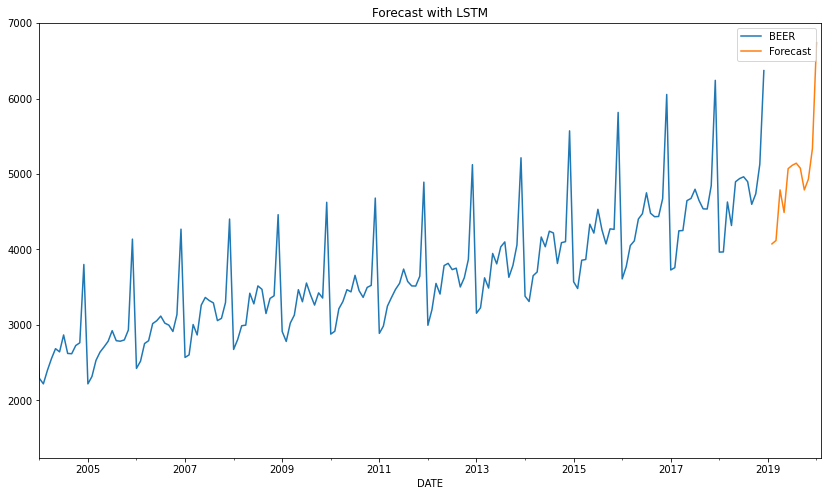

In [514]:
ax=df.plot(figsize=(14,8),legend=True)
forecast_df.plot(ax=ax,legend=True)
plt.xlim('2004-01-01','2020-02-01')
plt.title('Forecast with LSTM')

# Holt Winters vs SARIMA vs LSTM

(577.0, 587.0)

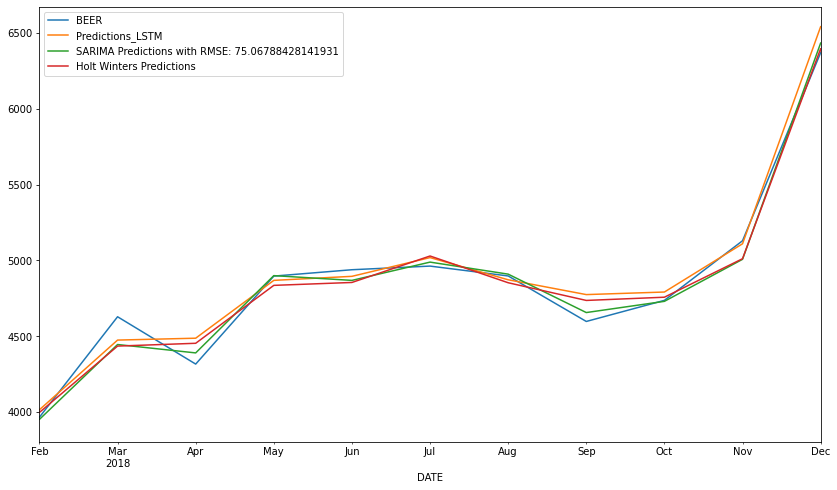

In [504]:
test.plot(figsize=(14,8),legend=True)
predictions_SARIMA.plot(legend=True, label=f'SARIMA Predictions with RMSE: {error_SARIMA}')
test_predictions_hw.plot(legend=True, label=f'Holt Winters Predictions')
plt.xlim('2018-02-01','2018-12-01')

# Evaluate Model

In [503]:
error_LSTM=rmse(test['BEER'],test['Predictions_LSTM'])
error_LSTM

102.73618026256867

# **FB Prophet**

In [281]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install --upgrade git+https://github.com/jroakes/google-analytics.git
  !pip install fbprophet
except:
  pass
finally:
  clear_output()
  print('All Loaded')

All Loaded


In [0]:
from fbprophet import Prophet
from statsmodels.tools.eval_measures import mse, rmse,meanabs
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot

In [295]:
df = pd.read_csv(io.BytesIO(uploaded['BeerWineLiquor.csv']))
df.head()

,DATE,BEER
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [296]:
df.columns=['ds','y']
df

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [297]:
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


# Split Data

In [0]:
train=df.iloc[:312]
test=df.iloc[312:]

# Create Model

In [299]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=12,freq='MS')
forecast=m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Plot vs Test Data

ERROR! Session/line number was not unique in database. History logging moved to new session 67


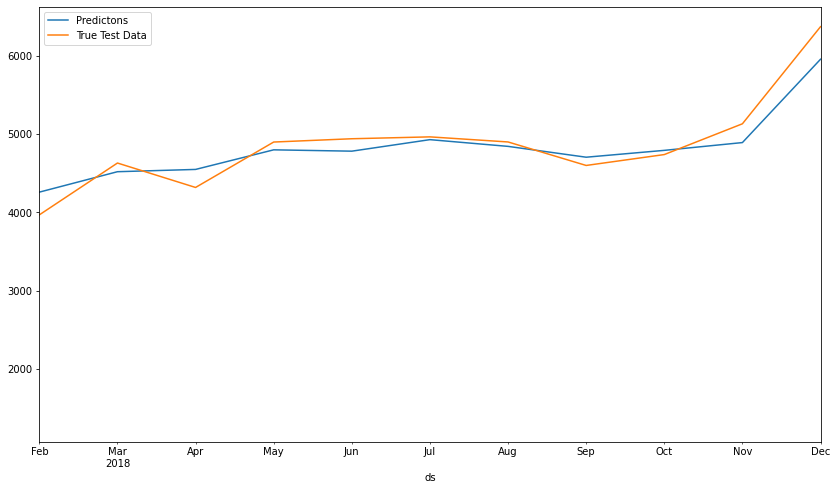

In [303]:
ax=forecast.plot(x='ds',y='yhat',label='Predictons', legend=True,figsize=(14,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True, ax=ax,xlim=('2018-02-01','2018-12-01'))

# Evaluate

In [301]:
predictions=forecast.iloc[-12:]['yhat']
predictions

312    4259.681023
313    4257.289588
314    4518.079192
315    4547.249656
316    4797.429009
317    4780.470643
318    4927.475288
319    4841.599117
320    4703.271288
321    4790.659878
322    4890.120342
323    5954.282722
Name: yhat, dtype: float64

In [302]:
error_fb=rmse(predictions,test['y'])
error_fb

208.21399567327987

# Retrain

In [305]:
# fit entire dataset
model=Prophet()
model.fit(df)
#placehoer to future predictions
future=model.make_future_dataframe(periods=12,freq='MS')
forecast=model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

# Forecast

(735234.0, 737456.0)

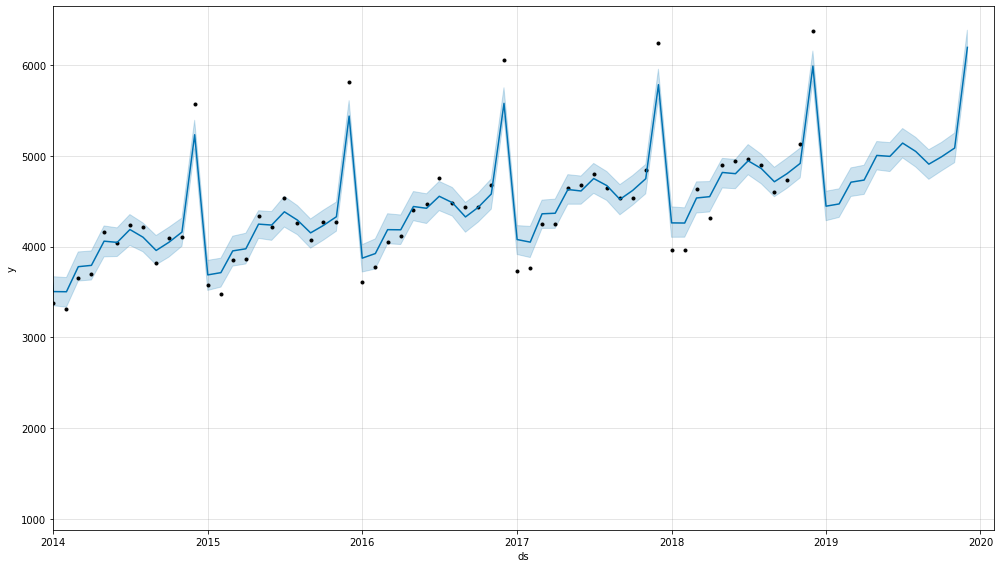

In [307]:
model.plot(forecast,figsize=(14,8));
plt.xlim('2014-01-01','2020-02-01')

# Trend with Prophet

In [0]:
from fbprophet.plot import add_changepoints_to_plot

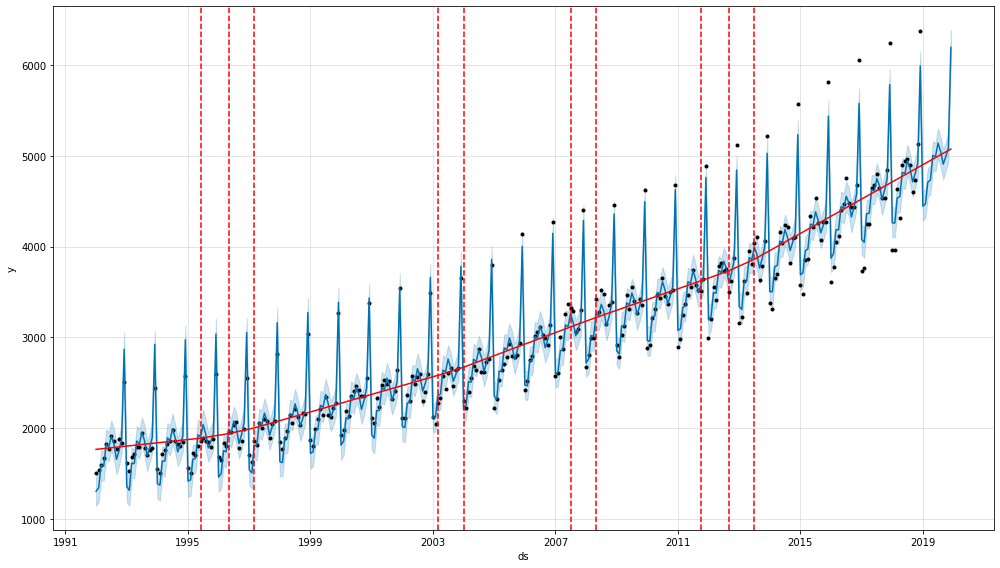

In [309]:
fig=model.plot(forecast,figsize=(14,8))
a=add_changepoints_to_plot(fig.gca(),model,forecast)